# Hazard class

#### What is a hazard?
A hazard describes weather events such as storms, floods, droughts, or heat waves both in terms of probability of occurrence as well as physical intensity.

<br>

#### How are hazards embedded in the CLIMADA architecture?
Hazards are defined by the base class `Hazard` which gathers the required attributes that enable the impact computation (such as centroids, frequency per event, and intensity per event and centroid) and common methods such as readers and visualization functions. Each hazard class collects historical data or model simulations and transforms them, if necessary, in order to construct a coherent event database. Stochastic events can be generated taking into account the frequency and main intensity characteristics (such as local water depth for floods or gust speed for storms) of historical events, producing an ensemble of probabilistic events for each historical event. CLIMADA provides therefore an event-based probabilistic approach which does not depend on a hypothesis of a priori general probability distribution choices. The source of the historical data (e.g. inventories or satellite images) or model simulations (e.g. synthetic tropical cyclone tracks) and the methodologies used to compute the hazard attributes and its stochastic events depend on each hazard type and are defined in its corresponding Hazard-derived class (e.g. `TropCylcone` for tropical cyclones, explained in the tutorial [TropCyclone](climada_hazard_TropCyclone.ipynb)). This procedure provides a solid and homogeneous methodology to compute impacts worldwide. In the case where the risk analysis comprises a specific region where good quality data or models describing the hazard intensity and frequency are available, these can be directly ingested by the platform through the reader functions, skipping the hazard modelling part (in total or partially), and allowing us to easily and seamlessly combine CLIMADA with external sources. Hence the impact model can be used for a wide variety of applications, e.g. deterministically to assess the impact of a single (past or future) event or to quantify risk based on a (large) set of probabilistic events. Note that since the `Hazard` class is not an abstract class, any hazard that is not defined in CLIMADA can still be used by providing the `Hazard` attributes.

<br>

#### What do hazards look like in CLIMADA?

A `Hazard` contains events of some hazard type defined at `centroids`. There are certain variables in a `Hazard` instance that _are needed_ to compute the impact, while others are _descriptive_ and can therefore be set with default values. The full list of looks like this:

| Mandatory variables &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| Data Type &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| Description &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
| :- | :- | :- |
| tag |`TagHazard()`| information about the source|
| units |(str)| units of the intensity|
| centroids |`Centroids()`| centroids of the events|
| event_id |(np.array)| id (>0) of each event|
| frequency |(np.array)| frequency of each event in years|
| intensity |(sparse.csr_matrix)| intensity of the events at centroids|
| fraction |(sparse.csr_matrix)| fraction of affected exposures for each event at each centroid|

<br>
<br>

| Descriptive variables | Data Type | Description|
| :- | :- | :- |
| date |(np.array)| integer date corresponding to the proleptic Gregorian ordinal, where January 1 of year 1 has<br> ordinal 1 (ordinal format of datetime library)|
| orig |(np.array)| flags indicating historical events (True) or probabilistic (False) |
| event_name |(list(str))| name of each event (default: event_id)|
<br>

Note that `intensity` and `fraction` are scipy.sparse matrices of size num_events x num_centroids. The `Centroids` class contains the geographical coordinates where the hazard is defined. A `Centroids` instance provides the coordinates either as points or raster data together with their Coordinate Reference System (CRS). The default CRS used in climada is the usual EPSG:4326. `Centroids` provides moreover methods to compute centroids areas, on land mask, country iso mask or distance to coast.

### How is this tutorial structured?

[**Part 1:**](#Part1) Read hazards from raster data

[**Part 2:**](#Part2) Read hazards from other data

[**Part 3:**](#Part3) Define hazards manually

[**Part 4:**](#Part4) Analyse hazards

[**Part 5:**](#Part5) Visualize hazards

[**Part 6:**](#Part6) Write (=save) hazards

<a id='Part1'></a> 
## Part 1: Read hazards from raster data

Raster data can be read in any format accepted by [rasterio](https://rasterio.readthedocs.io/en/stable/) using `Hazard`'s `from_raster()` method. The raster information might refer to the `intensity` or `fraction`of the hazard. Different configuration options such as transforming the coordinates, changing the CRS and reading only a selected area or band are available through the `from_raster()` arguments as follows:

2021-06-04 17:07:27,902 - climada.util.coordinates - INFO - Reading /Users/zeliestalhanske/climada/demo/data/SC22000_VE__M1.grd.gz
event_id:  [1]
event_name:  ['1']
date:  [1.]
frequency:  [0.5]
orig:  [ True]
min, max fraction:  0.0 1.0


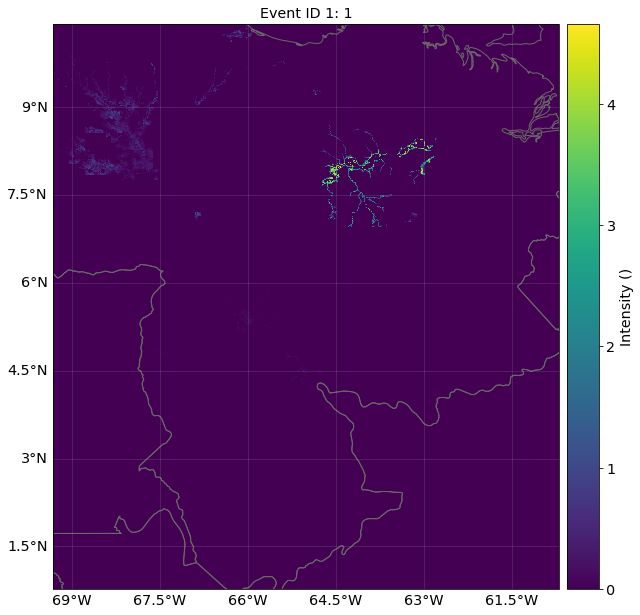

In [1]:
%matplotlib inline
import numpy as np
from climada.hazard import Hazard
from climada.util.constants import HAZ_DEMO_FL

# read intensity from raster file HAZ_DEMO_FL and set frequency for the contained event
haz_ven = haz_ven.from_raster([HAZ_DEMO_FL], attrs={'frequency':np.ones(1)/2}, haz_type='FL')
haz_ven.check()

# The masked values of the raster are set to 0
# Sometimes the raster file does not contain all the information, as in this case the mask value -9999
# We mask it manuall and plot it using plot_intensity()
haz_ven.intensity[haz_ven.intensity==-9999] = 0
haz_ven.plot_intensity(1, smooth=False) # if smooth=True (default value) is used, the computation time might increase

# per default the following attributes have been set
print('event_id: ', haz_ven.event_id)
print('event_name: ', haz_ven.event_name)
print('date: ', haz_ven.date)
print('frequency: ', haz_ven.frequency)
print('orig: ', haz_ven.orig)
print('min, max fraction: ', haz_ven.fraction.min(), haz_ven.fraction.max())

### EXERCISE:

1. Read raster data in EPSG 2201 Coordinate Reference System (CRS)
2. Read raster data in its given CRS and transform it to the affine transformation Affine(0.009000000000000341, 0.0, -69.33714959699981, 0.0, -0.009000000000000341, 10.42822096697894), height=500, width=501)
3. Read raster data in window Window(10, 10, 20, 30)

In [2]:
# Put your code here





In [3]:
# Solution:

# 1. The CRS can be reprojected using dst_crs option
haz = Hazard.from_raster([HAZ_DEMO_FL], dst_crs={'init':'epsg:2201'}, haz_type='FL') 
haz.check()
print('\n Solution 1:')
print('centroids CRS:', haz.centroids.crs)
print('raster info:', haz.centroids.meta)

# 2. Transformations of the coordinates can be set using the transform option and Affine 
from rasterio import Affine
haz = Hazard.from_raster([HAZ_DEMO_FL], haz_type='FL',
                         transform=Affine(0.009000000000000341, 0.0, -69.33714959699981, \
                                          0.0, -0.009000000000000341, 10.42822096697894),
                         height=500, width=501) 
haz.check()
print('\n Solution 2:')
print('raster info:', haz.centroids.meta)
print('intensity size:', haz.intensity.shape)

# 3. A partial part of the raster can be loaded using the window or geometry
from rasterio.windows import Window
haz = Hazard.from_raster([HAZ_DEMO_FL], haz_type='FL', window=Window(10, 10, 20, 30))
haz.check()
print('\n Solution 3:')
print('raster info:', haz.centroids.meta)
print('intensity size:', haz.intensity.shape)

2021-06-04 17:07:36,789 - climada.util.coordinates - INFO - Reading /Users/zeliestalhanske/climada/demo/data/SC22000_VE__M1.grd.gz

 Solution 1:
centroids CRS: {'init': 'epsg:2201'}
raster info: {'driver': 'GSBG', 'dtype': 'float32', 'nodata': 1.701410009187828e+38, 'width': 978, 'height': 1091, 'count': 1, 'crs': {'init': 'epsg:2201'}, 'transform': Affine(1011.5372910988809, 0.0, 1120744.5486664253,
       0.0, -1011.5372910988809, 1189133.7652687666)}
2021-06-04 17:07:40,873 - climada.util.coordinates - INFO - Reading /Users/zeliestalhanske/climada/demo/data/SC22000_VE__M1.grd.gz

 Solution 2:
raster info: {'driver': 'GSBG', 'dtype': 'float32', 'nodata': 1.701410009187828e+38, 'width': 501, 'height': 500, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.009000000000000341, 0.0, -69.33714959699981,
       0.0, -0.009000000000000341, 10.42822096697894)}
intensity size: (1, 250500)
2021-06-04 17:07:44,486 - climada.util.coordinates - INFO - Reading /Users/zeliestalhanske/cl

<a id='Part2'></a> 
## Part 2: Read hazards from other data

- excel: Hazards can be read from Excel files following the template in `climada_python/data/system/hazard_template.xlsx` using the `from_excel()` method. 
- MATLAB: Hazards generated with CLIMADA's MATLAB version (.mat format) can be read using `from_mat()`.
- vector data: Use `Hazard`'s `from_vector`-constructor to read shape data (all formats supported by [fiona](https://fiona.readthedocs.io/en/latest/manual.html)).
- hdf5: Hazards generated with the CLIMADA in Python (.h5 format) can be read using `from_hdf5()`.

In [4]:
from climada.hazard import Hazard
from climada.util import HAZ_DEMO_H5 # CLIMADA's Python file
# Hazard needs to know the acronym of the hazard type to be constructed!!! Use 'NA' if not known.
haz_tc_fl = Hazard.from_hdf5(HAZ_DEMO_H5)  # Historic tropical cyclones in Florida from 1990 to 2004
haz_tc_fl.check() # Use always the check() method to see if the hazard has been loaded correctly

2021-06-04 17:07:44,529 - climada.hazard.base - INFO - Reading /Users/zeliestalhanske/climada/demo/data/tc_fl_1990_2004.h5


/Users/zeliestalhanske/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<a id='Part3'></a> 
## Part 3: Define hazards manually
A `Hazard` can be defined by filling its values one by one, as follows:

<GeoAxesSubplot:>

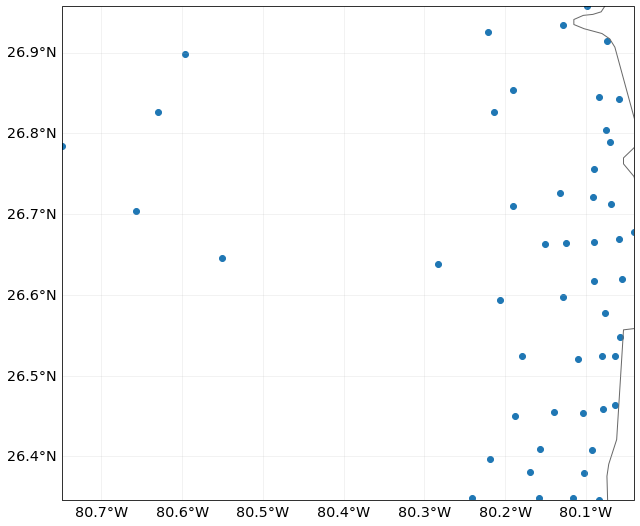

In [5]:
# setting points 
import numpy as np
from scipy import sparse

lat = np.array([26.933899, 26.957203, 26.783846, 26.645524, 26.897796, 26.925359, \
       26.914768, 26.853491, 26.845099, 26.82651 , 26.842772, 26.825905, \
       26.80465 , 26.788649, 26.704277, 26.71005 , 26.755412, 26.678449, \
       26.725649, 26.720599, 26.71255 , 26.6649  , 26.664699, 26.663149, \
       26.66875 , 26.638517, 26.59309 , 26.617449, 26.620079, 26.596795, \
       26.577049, 26.524585, 26.524158, 26.523737, 26.520284, 26.547349, \
       26.463399, 26.45905 , 26.45558 , 26.453699, 26.449999, 26.397299, \
       26.4084  , 26.40875 , 26.379113, 26.3809  , 26.349068, 26.346349, \
       26.348015, 26.347957])

lon = np.array([-80.128799, -80.098284, -80.748947, -80.550704, -80.596929, \
       -80.220966, -80.07466 , -80.190281, -80.083904, -80.213493, \
       -80.0591  , -80.630096, -80.075301, -80.069885, -80.656841, \
       -80.190085, -80.08955 , -80.041179, -80.1324  , -80.091746, \
       -80.068579, -80.090698, -80.1254  , -80.151401, -80.058749, \
       -80.283371, -80.206901, -80.090649, -80.055001, -80.128711, \
       -80.076435, -80.080105, -80.06398 , -80.178973, -80.110519, \
       -80.057701, -80.064251, -80.07875 , -80.139247, -80.104316, \
       -80.188545, -80.21902 , -80.092391, -80.1575  , -80.102028, \
       -80.16885 , -80.116401, -80.08385 , -80.241305, -80.158855])

n_cen = lon.size # number of centroids
n_ev = 10 # number of events

haz = Hazard('TC')
haz.centroids = Centroids.from_lat_lon(lat, lon) # default crs used
haz.intensity = sparse.csr_matrix(np.random.random((n_ev, n_cen)))
haz.units = 'm'
haz.event_id = np.arange(n_ev, dtype=int)
haz.event_name = ['ev_12', 'ev_21', 'Maria', 'ev_35', 'Irma', 'ev_16', 'ev_15', 'Edgar', 'ev_1', 'ev_9']
haz.date = [721166, 734447, 734447, 734447, 721167, 721166, 721167, 721200, 721166, 721166]
haz.orig = np.zeros(n_ev, bool)
haz.frequency = np.ones(n_ev)/n_ev
haz.fraction = haz.intensity.copy()
haz.fraction.data.fill(1)
haz.check()
haz.centroids.plot()

Check centroids borders: (-72.0, -3.0, -52.0, 22.0)
Check centroids borders: (-72.25, -3.25, -51.75, 22.25)


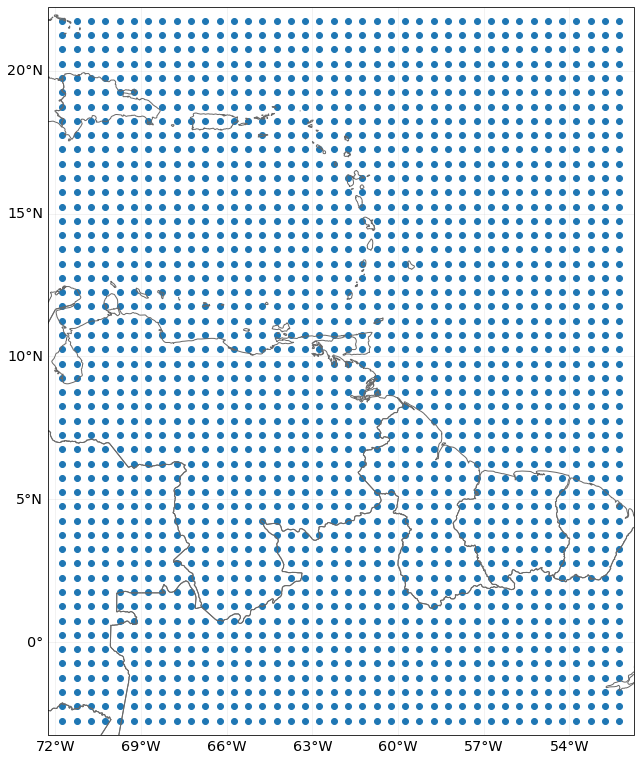

In [6]:
# setting raster 
import numpy as np
from scipy import sparse

# raster info:
# border upper left corner (of the pixel, not of the center of the pixel)
xf_lat = 22
xo_lon = -72
# resolution in lat and lon
d_lat = -0.5 # negative because starting in upper corner
d_lon = 0.5 # same step as d_lat
# number of points
n_lat = 50
n_lon = 40

n_ev = 10 # number of events

haz = Hazard('TC')
haz.centroids = Centroids.from_pix_bounds(xf_lat, xo_lon, d_lat, d_lon, n_lat, n_lon) # default crs used
haz.intensity = sparse.csr_matrix(np.random.random((n_ev, haz.centroids.size)))
haz.units = 'm'
haz.event_id = np.arange(n_ev, dtype=int)
haz.event_name = ['ev_12', 'ev_21', 'Maria', 'ev_35', 'Irma', 'ev_16', 'ev_15', 'Edgar', 'ev_1', 'ev_9']
haz.date = [721166, 734447, 734447, 734447, 721167, 721166, 721167, 721200, 721166, 721166]
haz.orig = np.zeros(n_ev, bool)
haz.frequency = np.ones(n_ev)/n_ev
haz.fraction = haz.intensity.copy()
haz.fraction.data.fill(1)
haz.check()
print('Check centroids borders:', haz.centroids.total_bounds)
haz.centroids.plot()

# using from_pnt_bounds, the bounds refer to the bounds of the center of the pixel
left, bottom, right, top = xo_lon, -3.0, -52.0, xf_lat
haz.centroids = Centroids.from_pnt_bounds((left, bottom, right, top), 0.5) # default crs used
print('Check centroids borders:', haz.centroids.total_bounds)

<a id='Part4'></a> 
## Part 4: Analyse Hazards

The following methods can be used to analyse the data in `Hazard`:

- `calc_year_set()` method returns a dictionary with all the historical (not synthetic) event ids that happened at each year. 
- `get_event_date()` returns strings of dates in ISO format.
- To obtain the relation between event ids and event names, two methods can be used `get_event_name()` and `get_event_id()`. 

Other methods to handle one or several Hazards are:
- the property `size` returns the number of events contained.
- `append()` is used to expand events with data from another `Hazard` (and same centroids).
- `select()` returns a new hazard with the selected region, date and/or synthetic or historical filter.
- `remove_duplicates()` removes events with same name and date.
- `local_exceedance_inten()` returns a matrix with the exceedence frequency at every frequency and provided return periods. This is the one used in `plot_rp_intensity()`.
- `reproject_raster()`, `reproject_vector()`, `raster_to_vector()`, `vector_to_raster()` are methods to change centroids' CRS and between raster and vector data. 

`Centroids` methods:
- centroids properties such as area per pixel, distance to coast, country ISO code, on land mask or elevation are available through different `set_XX()`methods.
- `set_lat_lon_to_meta()` computes the raster `meta` dictionary from present lat and lon. `set_meta_to_lat_lon()` computes lat and lon of the center of the pixels described in attribute `meta`. The raster `meta` information contains at least: `width`, `height`, `crs` and `transform` data (use help(Centroids) for more info). Using raster centroids can increase computing performance for several computations.
- when using lats and lons (vector data) the `geopandas.GeoSeries` `geometry` attribute contains the CRS information and can be filled with point shapes to perform different computation. The geometry points can be then released using `empty_geometry_points()`.

### EXERCISE:

Using the previous hazard `haz_tc_fl` answer these questions:
1. How many synthetic events are contained?
2. Generate a hazard with historical hurricanes ocurring between 1995 and 2001.
3. How many historical hurricanes occured in 1999? Which was the year with most hurricanes between 1995 and 2001?
4. What is the number of centroids with distance to coast smaller than 1km?

In [7]:
# Put your code here:



In [8]:
#help(hist_tc.centroids)

In [9]:
# SOLUTION:

# 1.How many synthetic events are contained?
print('Number of total events:', haz_tc_fl.size)
print('Number of synthetic events:', np.logical_not(haz_tc_fl.orig).astype(int).sum())

# 2. Generate a hazard with historical hurricanes ocurring between 1995 and 2001.
hist_tc = haz_tc_fl.select(date=('1995-01-01', '2001-12-31'), orig=True)
print('Number of historical events between 1995 and 2001:', hist_tc.size)

# 3. How many historical hurricanes occured in 1999? Which was the year with most hurricanes between 1995 and 2001?
ev_per_year = hist_tc.calc_year_set() # events ids per year
print('Number of events in 1999:', ev_per_year[1999].size)
max_year = 1995
max_ev = ev_per_year[1995].size
for year, ev in ev_per_year.items():
    if ev.size > max_ev:
        max_year = year
print('Year with most hurricanes between 1995 and 2001:', max_year)

# 4. What is the number of centroids with distance to coast smaller than 1km?
hist_tc.centroids.set_dist_coast()
num_cen_coast = np.argwhere(hist_tc.centroids.dist_coast < 1000).size
print('Number of centroids close to coast: ', num_cen_coast)

Number of total events: 216
Number of synthetic events: 0
Number of historical events between 1995 and 2001: 109
Number of events in 1999: 16
Year with most hurricanes between 1995 and 2001: 1995
2021-06-04 17:07:50,281 - climada.hazard.centroids.centr - INFO - Convert centroids to GeoSeries of Point shapes.
2021-06-04 17:07:51,542 - climada.util.coordinates - INFO - dist_to_coast: UTM 32617 (1/2)


/Users/zeliestalhanske/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/zeliestalhanske/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-04 17:07:53,271 - climada.util.coordinates - INFO - dist_to_coast: UTM 32618 (2/2)


/Users/zeliestalhanske/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/zeliestalhanske/miniconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Number of centroids close to coast:  41


<a id='Part5'></a> 
## Part 5: Visualize Hazards

There are three different plot functions: `plot_intensity()`, `plot_fraction()`and `plot_rp_intensity()`. Depending on the inputs, different properties can be visualized. Check the documentation of the functions:

In [10]:
help(haz_tc_fl.plot_intensity)
help(haz_tc_fl.plot_rp_intensity)

Help on method plot_intensity in module climada.hazard.base:

plot_intensity(event=None, centr=None, smooth=True, axis=None, adapt_fontsize=True, **kwargs) method of climada.hazard.base.Hazard instance
    Plot intensity values for a selected event or centroid.
    
    Parameters:
        event (int or str, optional): If event > 0, plot intensities of
            event with id = event. If event = 0, plot maximum intensity in
            each centroid. If event < 0, plot abs(event)-largest event. If
            event is string, plot events with that name.
        centr (int or tuple, optional): If centr > 0, plot intensity
            of all events at centroid with id = centr. If centr = 0,
            plot maximum intensity of each event. If centr < 0,
            plot abs(centr)-largest centroid where higher intensities
            are reached. If tuple with (lat, lon) plot intensity of nearest
            centroid.
        smooth (bool, optional): Rescale data to RESOLUTIONxRESOLUTI

2021-06-04 17:07:56,644 - climada.hazard.base - INFO - Computing exceedance intenstiy map for return periods: [ 10  50  75 100]
2021-06-04 17:07:57,198 - climada.hazard.base - WARNING - Exceedance intenstiy values below 0 are set to 0.                    Reason: no negative intensity values were found in hazard.


/Users/zeliestalhanske/python_projects/climada_python/climada/hazard/centroids/centr.py:571: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  close_idx = self.geometry.distance(Point(x_lon, y_lat)).values.argmin()


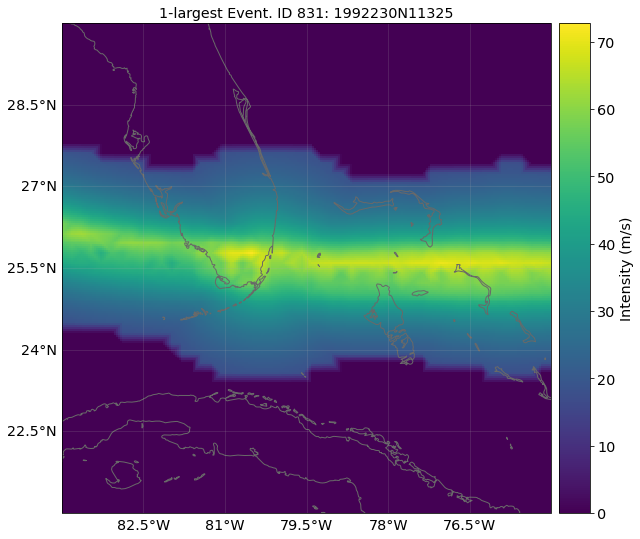

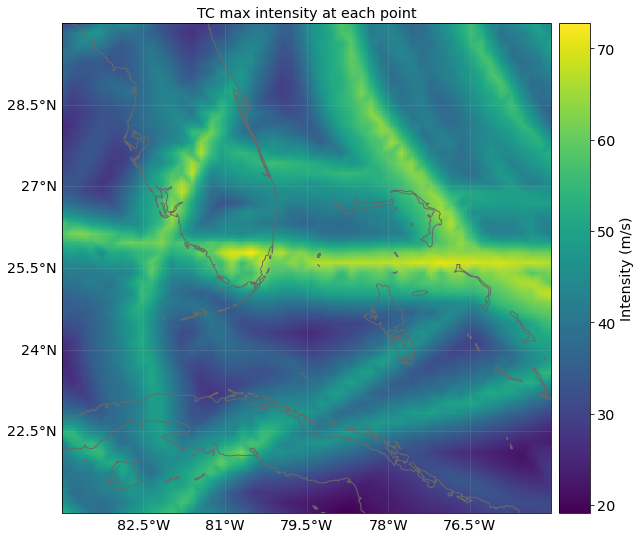

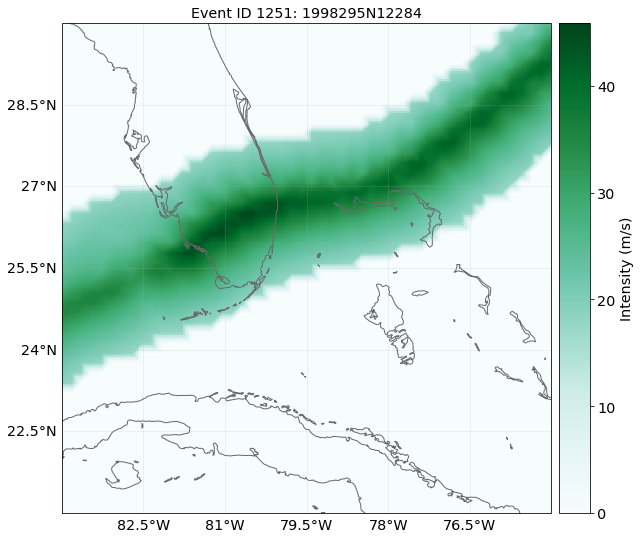

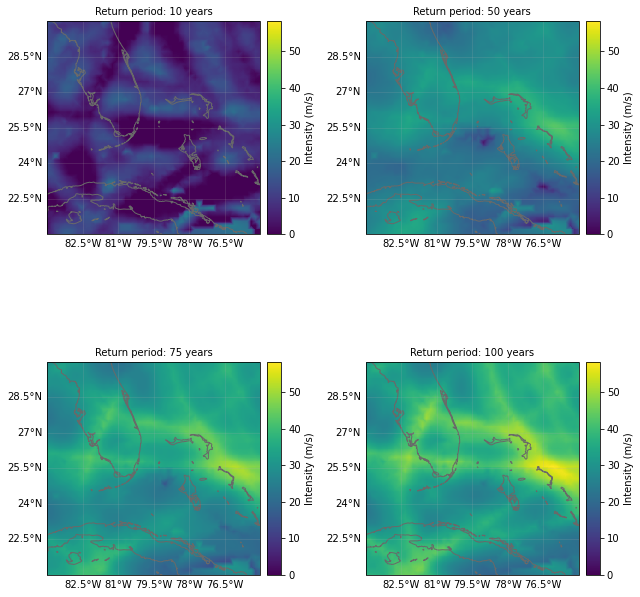

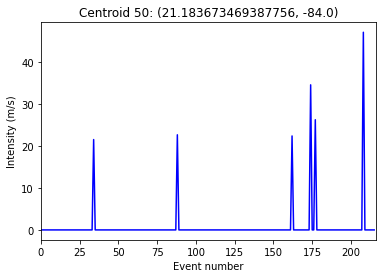

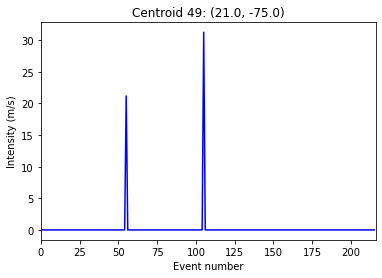

In [11]:
# 1. intensities of the largest event (defined as greater sum of intensities):
# all events:
haz_tc_fl.plot_intensity(event=-1) # largest historical event: 1992230N11325 hurricane ANDREW

# 2. maximum intensities at each centroid:
haz_tc_fl.plot_intensity(event=0)

# 3. intensities of hurricane 1998295N12284:
haz_tc_fl.plot_intensity(event='1998295N12284', cmap='BuGn') # setting color map

# 4. tropical cyclone intensities maps for the return periods [10, 50, 75, 100]
_, res = haz_tc_fl.plot_rp_intensity([10, 50, 75, 100])

# 5. intensities of all the events in centroid with id 50
haz_tc_fl.plot_intensity(centr=50)

# 6. intensities of all the events in centroid closest to lat, lon = (26.5, -81)
haz_tc_fl.plot_intensity(centr=(26.5, -81));

/Users/zeliestalhanske/python_projects/climada_python/climada/hazard/centroids/centr.py:571: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  close_idx = self.geometry.distance(Point(x_lon, y_lat)).values.argmin()


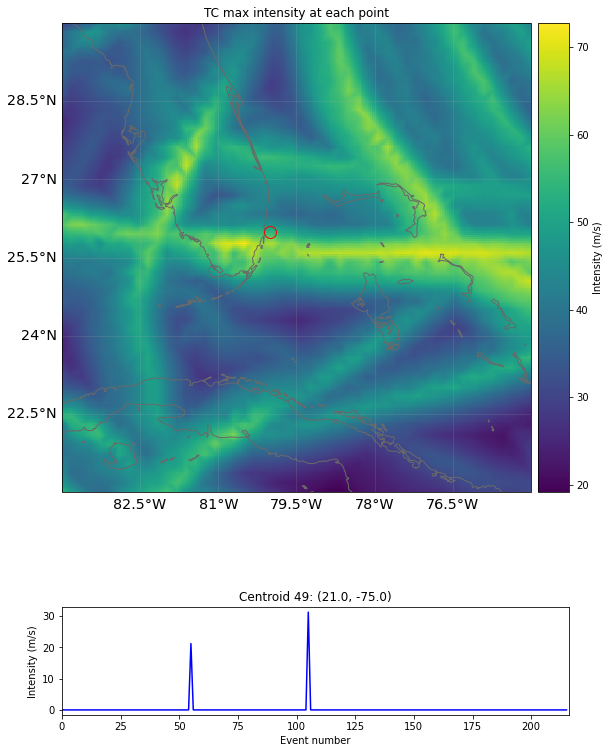

In [12]:
# 7. one figure with two plots: maximum intensities and selected centroid with all intensities:
from climada.util.plot import make_map
import matplotlib.pyplot as plt
plt.ioff()
fig, ax1, fontsize = make_map(1)  # map
ax2 = fig.add_subplot(2, 1, 2) # add regular axes
haz_tc_fl.plot_intensity(axis=ax1, event=0) # plot original resolution
ax1.plot(-80, 26, 'or', mfc='none', markersize=12)
haz_tc_fl.plot_intensity(axis=ax2, centr=(26, -80))
fig.subplots_adjust(hspace=6.5)

<a id='Part6'></a> 
## Part 6: Write (=save) hazards

Hazards can be written and read in hdf5 format as follows:

In [13]:
haz_tc_fl.write_hdf5('results/haz_tc_fl.h5')

haz = Hazard.from_hdf5('results/haz_tc_fl.h5')
haz.check()

2021-06-04 17:08:17,623 - climada.hazard.base - INFO - Writing results/haz_tc_fl.h5
2021-06-04 17:08:17,707 - climada.hazard.base - INFO - Reading results/haz_tc_fl.h5


GeoTiff data is generated using `write_raster()`:

In [14]:
haz_ven.write_raster('results/haz_ven.tif') # each event is a band of the tif file

2021-06-04 17:08:17,739 - climada.util.coordinates - INFO - Writting results/haz_ven.tif


Pickle will work as well:

In [15]:
from climada.util.save import save
# this generates a results folder in the current path and stores the output there
save('tutorial_haz_tc_fl.p', haz_tc_fl)

2021-06-04 17:08:17,817 - climada.util.save - INFO - Written file /Users/zeliestalhanske/python_projects/climada_python/doc/tutorial/results/tutorial_haz_tc_fl.p
